In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt


## Get Dataset

In [2]:
# img_height = 256
# img_width = 256

# data_dir = "dataset"

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   seed=420,
#   image_size=(img_height, img_width),
#   batch_size=None)

Found 1108 files belonging to 4 classes.


In [3]:
import tensorflow as tf
import numpy as np

def dataset_to_numpy(dataset):
    images, labels = [], []
    for image, label in dataset:
        images.append(image.numpy())
        labels.append(label.numpy())
    return np.stack(images), np.array(labels)

# Assuming you have a TensorFlow dataset
data_dir = "dataset"
dataset = tf.keras.utils.image_dataset_from_directory(
	data_dir,
	labels='inferred',
	image_size=(150, 150),
	batch_size=None
)

# Split dataset into train and validation sets
train_size = int(0.8 * len(dataset))
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

# Convert to NumPy arrays
x_train, y_train = dataset_to_numpy(train_dataset)
x_val, y_val = dataset_to_numpy(val_dataset)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")


Found 1108 files belonging to 4 classes.
x_train shape: (886, 150, 150, 3), y_train shape: (886,)
x_val shape: (222, 150, 150, 3), y_val shape: (222,)


In [4]:
class_names = dataset.class_names

In [5]:
x_train.shape

(886, 150, 150, 3)

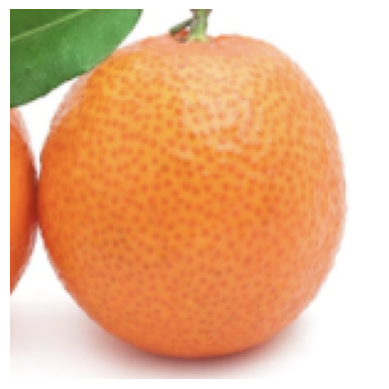

In [6]:
plt.imshow(x_train[0].astype(np.uint8))
plt.axis("off")
plt.show()

### Standardize the data

In [7]:
standardize_func = np.vectorize(lambda x: x/255.0)

normalized_train = standardize_func(x_train)

#Notice the pixel values are now in `[0,1]`.
print(np.min(normalized_train[0]), np.max(normalized_train[0]))

0.08972548 1.0


In [8]:
normalized_train.shape

(886, 150, 150, 3)

In [9]:
def flatten_numpy(dataset):
    result = np.array([data.flatten() for data in dataset])
    return result

# Assuming normalized_train has a shape of (886, 150, 150, 3)
X_train = flatten_numpy(normalized_train)


print(X_train.shape)  # Should output: (886, 67500)

(886, 67500)


## Train model

In [16]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.Input(shape=(67500,)),
  Dense(32, activation='relu', name="L1"),
  Dense(32, activation='relu', name="L2"),
  Dense(32, activation='relu', name="L3"),
  Dense(128, activation='relu', name="L4"),
  Dense(num_classes, activation="linear", name="L5")
], name="fruit_recognizer")

model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [47]:
model.fit(
  X_train,y_train,
  epochs=40
)

Epoch 1/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8564 - loss: 0.4017
Epoch 2/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8481 - loss: 0.3779
Epoch 3/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8902 - loss: 0.3293
Epoch 4/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9047 - loss: 0.2494
Epoch 5/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9194 - loss: 0.2399
Epoch 6/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7996 - loss: 0.6197
Epoch 7/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9125 - loss: 0.2375
Epoch 8/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8855 - loss: 0.2995
Epoch 9/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9250 - loss: 0.2045
Epoch 10/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9421 - loss: 0.1912
Epoch 11/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9035 - loss: 0.2578
Epoch 12/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy:

In [48]:
#softmax prediction
prediction_p = tf.nn.softmax(model.predict(X_train[0].reshape(1,67500)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [49]:
np.argmax(prediction_p)

np.int64(3)

In [50]:
y_hats = model.predict(X_train)
y_hats = [np.argmax(tf.nn.softmax(y_hat)) for y_hat in y_hats]
sum(y_hats == y_train) / len(y_hats)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


np.float64(0.9616252821670429)

In [51]:
standardize_func = np.vectorize(lambda x: x/255.0)
normalized_val = standardize_func(x_val)

def flatten_numpy(dataset):
    result = np.array([data.flatten() for data in dataset])
    return result

# Assuming normalized_train has a shape of (886, 150, 150, 3)
X_val = flatten_numpy(normalized_val)



y_hats = model.predict(X_val)
y_hats = [np.argmax(tf.nn.softmax(y_hat)) for y_hat in y_hats]
sum(y_hats == y_val) / len(y_hats)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


np.float64(0.9279279279279279)

## Create Pipline to process data

In [57]:
# x need to be in numpy array
def format_input(x):
    return (x/255.0).flatten()



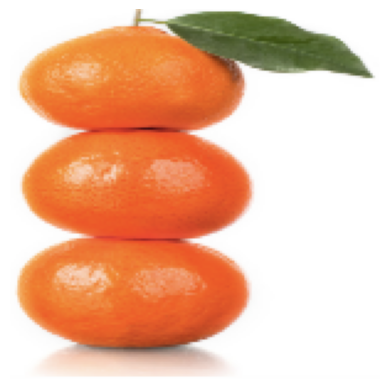

In [58]:
plt.imshow(x_val[0].astype(np.uint8))
plt.axis("off")
plt.show()

In [69]:
(x_val[0]/255).flatten()

array([1.        , 1.        , 1.        , ..., 0.99960685, 0.99960685,
       0.99960685], dtype=float32)

In [75]:
prediction = np.argmax(model.predict(np.array((x_val[0] / 255).flatten()).reshape(1, -1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [76]:
class_names[prediction]

'orange'